# Desafio #QuarentenaDados

Bem-vinda e bem-vindo ao desafio #QuarentenaDados valendo um **Nintendo Switch**!

Esse notebook traz informações dos dados e como você deve configurar seu arquivo final para submissão.

**Caso queira usar esse notebook como exemplo para desenvolver seu projeto, clique em file e escolha a opção Save a copy in Drive**


Vamos trabalhar com uma amostra aleatória da base de dados MICRODADOS ENEM 2018, essa amostra é **diferente da apresentada em aula**. Junto com a divulgação do resultado final estaremos disponibilizando o código que gerou os dados para que você possa analisar e reproduzir os datasets. 

Seu objetivo é prever da melhor forma possível a nota das provas de **linguagens e códigos** (NU_NOTA_LC), dado todas as outras notas. O modelo que tiver o menor **erro quadrático médio (MSE)** vence o desafio.

Para o desafio você tem três bases à disposição, duas para desenvolver seu modelo e uma para submissão da predição. As bases são as seguintes:

- **dados_treino**: São 1500000 linhas contendo a nota das 4 provas + nota de redação.

- **dados_teste**: São 20000 linhas contendo com notas das 4 provas + nota de redação.

- **dados_desafioqt**: São 10000 linhas com nota de 3 provas + nota de redação. A nota da prova de **Linguagem e Codigos** (NU_NOTA_LC) não está disponível nessa base.


As base **dados_treino e dados_teste**, contém as seguintes colunas; **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO, NU_NOTA_LC** (Você pode consultar a aula 5, onde o Guilherme explica o significado das siglas). A coluna que você deve realizar a **previsão** é **NU_NOTA_LC**. Você pode manipular os dados da forma que quiser, o importante é que no final submeta o arquivo com as informações corretas (detalhes da submissão serão discutidos no final deste notebook).

A base **dados_desafioqt**, contém as seguintes colunas; **ID, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO**. Repare que os dados **NU_NOTA_LC** não estão presentes, essa é justamente a informação que você precisa prever. Nós temos os valores reais das notas, no final do prazo de submissão um script irá avaliar sua previsão e dará uma nota para o seu modelo. Nessa base também temos o **ID**, essa informação é importante para o envio da sua previsão, garanta que a nota prevista corresponda ao respectivo **ID**.

Se você está habituado com o desenvolvimento de modelos de ML, repare que essa divisão de dados é exatamente a mesma que Treino, Teste e Validação. 

Abaixo preparamos um código exemplo para você seguir, sinta-se à vontade para experimentar diversos outros métodos, mas **GARANTA QUE O ARQUIVO DE SUBMISSÃO ESTEJA CONFIGURADO CORRETAMENTE**.

Na primeira parte, estamos lendo a base de dados direto de arquivos no github.






In [0]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

Agora com as bases de dados lidas, vamos separar as informações de cada dataset. X_treino e Y_treino são as **features**, X_teste e Y_teste são as **labels** a serem previstas.

Duas observações nesta parte:

- 1° Como já disponibilizamos os dados de treino e teste separados, você não precisa fazer *train_test_split* feito em aula (porém fique à vontade para trabalhar da forma que achar melhor).

- 2° Transformamos X_treino, Y_treino, X_teste, Y_teste em arrays numpy. Se você quiser usar uma biblioteca que não aceite dataframe como entrada de dados, já deixamos pronto para você.

In [4]:
dados_treino.tail(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
149990,583.7,628.6,582.8,670.0,700.0
149991,436.9,532.3,509.9,465.2,300.0
149992,533.9,567.5,445.8,395.2,280.0
149993,524.1,632.3,489.1,438.4,600.0
149994,465.5,586.1,571.7,644.6,520.0
149995,587.8,644.1,621.4,714.4,840.0
149996,385.0,525.6,473.2,446.2,520.0
149997,471.0,558.7,582.4,542.9,460.0
149998,476.7,463.5,553.3,434.0,0.0
149999,637.8,611.5,533.9,731.7,600.0


In [5]:
# Substituindo os zeros pela mediana da coluna

dados_treino.replace(0,dados_treino.median(axis=0),inplace=True)
dados_treino.tail(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
149990,583.7,628.6,582.8,670.0,700.0
149991,436.9,532.3,509.9,465.2,300.0
149992,533.9,567.5,445.8,395.2,280.0
149993,524.1,632.3,489.1,438.4,600.0
149994,465.5,586.1,571.7,644.6,520.0
149995,587.8,644.1,621.4,714.4,840.0
149996,385.0,525.6,473.2,446.2,520.0
149997,471.0,558.7,582.4,542.9,460.0
149998,476.7,463.5,553.3,434.0,520.0
149999,637.8,611.5,533.9,731.7,600.0


In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

A seguir criamos um modelo **Dummy** como exemplo e realizamos a avaliação do modelo com o **mean_squared_error**. 

Você pode usar qualquer algoritmo ou biblioteca para criar seus modelos, mas garanta que fará a avaliação com o mean_squared_error, pois usaremos essa métrica para avaliar sua predição final.

In [7]:
#Exemplo de classificação com Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_treino, Y_treino)
dummy_predicoes = modelo_dummy.predict(X_teste)

avaliacao_dummy = mean_squared_error(Y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 5219.556204113607


In [8]:
# Verificar a existência de dados faltantes (NaN)
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
for nota in colunas:
  print(f"Verificação isna() para {nota}:")
  print(dados_treino.isna().query(f'{nota} == True'))
  print(f"Verificação 'NaN' para {nota}")
  print(dados_treino.query(f"{nota} == 'NaN'"))
  print()

Verificação isna() para NU_NOTA_CN:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_CN
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []

Verificação isna() para NU_NOTA_CH:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_CH
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []

Verificação isna() para NU_NOTA_LC:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_LC
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []

Verificação isna() para NU_NOTA_MT:
Empty DataFrame
Columns: [NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT, NU_NOTA_REDACAO]
Index: []
Verificação 'NaN' para NU_NOTA_MT
Empty Data

In [9]:
# Após verificada a inexistência de NaN
# Avaliar as informações disponíveis para treino

dados_treino.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,493.945246,571.364451,528.736707,535.677004,526.902133
std,73.968118,77.221666,71.622148,102.866373,168.595107
min,362.500000,304.200000,318.800000,364.400000,40.000000
25%,435.800000,513.600000,478.000000,455.500000,380.000000
50%,483.600000,584.900000,533.400000,516.700000,520.000000
75%,542.500000,629.600000,581.400000,600.900000,640.000000
max,869.600000,825.800000,787.400000,996.100000,1000.000000


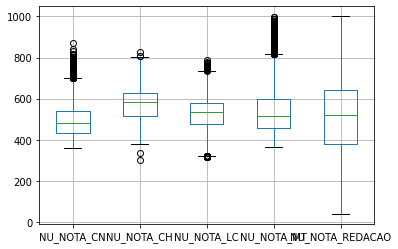

In [10]:
dados_treino.boxplot()

In [11]:
%%time
# Classificação utilizando Linear Regressor (valores default)
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
from sklearn.svm import LinearSVR

modelo_linear = LinearSVR(random_state=0)
modelo_linear.fit(X_treino, Y_treino)

linear_predic = modelo_linear.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_predic)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 2883.699388978955

CPU times: user 27.2 s, sys: 14.8 ms, total: 27.3 s
Wall time: 27.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
# Realizar a instalação da biblioteca scikit-optimize para tentar otimizar
# os modelos a serem testados
pip install scikit-optimize

     |████████████████████████████████| 81kB 2.5MB/s 


In [0]:
#%%time
# Criação de função para utilizar no gp_minimize (parte do scikit-optimize)
# Utilizando o modelo LinearSVR
# Variando os valores de C entre 0.1 e 0.5 e os valores de max_iter entre 5k e 10k
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
# Ref: https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html

from sklearn.svm import LinearSVR
from skopt import gp_minimize

def treinar_modelo(params):
  C = params[0]
  max_iter = params[1]
  
  print(params, '\n')

  modelo_linear = LinearSVR(C= C, max_iter= max_iter, random_state=0)
  modelo_linear.fit(X_treino, Y_treino)

  linear_predic = modelo_linear.predict(X_teste)

  return mean_squared_error(Y_teste, linear_predic)

#  Variáveis a serem repassadas para o gp_minimize
space = [(0.1, 0.5),      # C
         (5000,10000)]    # max_iter

In [12]:
# Bayesian Optimization
# Exploration Exploitation tradeoff

resultados_gp = gp_minimize(treinar_modelo, space, random_state=0, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.3371378472900074, 9221] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 142.9885
Function value obtained: 2283.0504
Current minimum: 2283.0504
Iteration No: 2 started. Evaluating function at random point.
[0.4431782470491028, 9236] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 130.7997
Function value obtained: 2249.0470
Current minimum: 2249.0470
Iteration No: 3 started. Evaluating function at random point.
[0.349425478714389, 6922] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 110.8657
Function value obtained: 3941.6829
Current minimum: 2249.0470
Iteration No: 4 started. Evaluating function at random point.
[0.21901384261778895, 5284] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 83.8669
Function value obtained: 2336.6128
Current minimum: 2249.0470
Iteration No: 5 started. Evaluating function at random point.
[0.20906251783204532, 7388] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 116.9711
Function value obtained: 2523.0796
Current minimum: 2249.0470
Iteration No: 6 started. Evaluating function at random point.
[0.4248674915101974, 7400] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 120.2268
Function value obtained: 5844.5106
Current minimum: 2249.0470
Iteration No: 7 started. Evaluating function at random point.
[0.25711391844033193, 9180] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 145.2552
Function value obtained: 2229.3211
Current minimum: 2229.3211
Iteration No: 8 started. Evaluating function at random point.
[0.23495846416690738, 8241] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 125.7481
Function value obtained: 2601.6919
Current minimum: 2229.3211
Iteration No: 9 started. Evaluating function at random point.
[0.2472966159362192, 9786] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 146.8667
Function value obtained: 3617.3623
Current minimum: 2229.3211
Iteration No: 10 started. Evaluating function at random point.
[0.15614031216505808, 9350] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 134.0951
Function value obtained: 2198.2423
Current minimum: 2198.2423
Iteration No: 11 started. Searching for the next optimal point.
[0.30280771092094017, 9205] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 141.9449
Function value obtained: 2215.7641
Current minimum: 2198.2423
Iteration No: 12 started. Searching for the next optimal point.
[0.32857658481061225, 9201] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 143.3123
Function value obtained: 2626.2608
Current minimum: 2198.2423
Iteration No: 13 started. Searching for the next optimal point.
[0.30499305949082867, 9200] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 142.9769
Function value obtained: 3321.2392
Current minimum: 2198.2423
Iteration No: 14 started. Searching for the next optimal point.
[0.3112538362831754, 9201] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 142.9666
Function value obtained: 2235.4947
Current minimum: 2198.2423
Iteration No: 15 started. Searching for the next optimal point.
[0.15614027894525132, 9350] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 133.9140
Function value obtained: 2198.2423
Current minimum: 2198.2423
Iteration No: 16 started. Searching for the next optimal point.
[0.1561403016558831, 9350] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 133.6552
Function value obtained: 2198.2423
Current minimum: 2198.2423
Iteration No: 17 started. Searching for the next optimal point.
[0.1561402981997314, 9350] 



/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 134.5349
Function value obtained: 2198.2423
Current minimum: 2198.2423
Iteration No: 18 started. Searching for the next optimal point.
[0.1561402975303187, 9350] 



/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 133.6994
Function value obtained: 2198.2423
Current minimum: 2198.2423
Iteration No: 19 started. Searching for the next optimal point.
[0.20111686520023483, 9258] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 140.6379
Function value obtained: 2588.2142
Current minimum: 2198.2423
Iteration No: 20 started. Searching for the next optimal point.
[0.22380165446484038, 9258] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 142.6322
Function value obtained: 2215.7698
Current minimum: 2198.2423
Iteration No: 21 started. Searching for the next optimal point.
[0.18570076735372826, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 136.5331
Function value obtained: 2396.4050
Current minimum: 2198.2423
Iteration No: 22 started. Searching for the next optimal point.
[0.21395575899607858, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 139.0681
Function value obtained: 2419.1965
Current minimum: 2198.2423
Iteration No: 23 started. Searching for the next optimal point.
[0.20917082016843358, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 141.8880
Function value obtained: 2245.5887
Current minimum: 2198.2423
Iteration No: 24 started. Searching for the next optimal point.
[0.22563398977390625, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 142.5693
Function value obtained: 2185.9072
Current minimum: 2185.9072
Iteration No: 25 started. Searching for the next optimal point.
[0.16616178403011542, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 135.3495
Function value obtained: 2212.4837
Current minimum: 2185.9072
Iteration No: 26 started. Searching for the next optimal point.
[0.19091224961194292, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 136.0039
Function value obtained: 2190.5146
Current minimum: 2185.9072
Iteration No: 27 started. Searching for the next optimal point.
[0.20161674294210358, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 136.4401
Function value obtained: 2393.4344
Current minimum: 2185.9072
Iteration No: 28 started. Searching for the next optimal point.
[0.1978988156965035, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 136.2837
Function value obtained: 2200.8586
Current minimum: 2185.9072
Iteration No: 29 started. Searching for the next optimal point.
[0.1950812783894249, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 136.4815
Function value obtained: 2248.1455
Current minimum: 2185.9072
Iteration No: 30 started. Searching for the next optimal point.
[0.11104605243179312, 9257] 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 120.9634
Function value obtained: 2232.3724
Current minimum: 2185.9072


PS: Houve uma outra tentativa em variar os hyper parâmetros, porém antes de conhecer a lib scikit-optimize (código na sequência).

In [0]:
%%time
# Classificação utilizando Linear Regressor (alterando valores: C, max_iter)
# PS: Tentativa realizada antes de conhecer o scikit-optimize
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
from sklearn.svm import LinearSVR
import pandas as pd

C_list=[0.1,0.25,0.33,0.5,0.75]
max_iter_list=[2000, 5000, 10000]
MSEmin=3000

for C_val in C_list:
  for max_val in max_iter_list:
    modelo_linear = LinearSVR(C= C_val, max_iter= max_val)
    modelo_linear.fit(X_treino, Y_treino)

    linear_predic = modelo_linear.predict(X_teste)

    aval_linear = mean_squared_error(Y_teste, linear_predic)
    if aval_linear < MSEmin:
      print(f"\nMSE: {aval_linear} para C={C_val} e max_iter={max_val}\n")


Após a execução do gp_minimize, obtivemos como menor MSE o valor 2185.90.
Ao verificar o passo, obtivemos C= 0.16616178403011542 e max_iter= 9257.

Realizarei o treino com os parâmetros C= 0.166 e max_iter= 9257.

In [16]:
%%time
# Classificação utilizando Linear Regressor (valores default)
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
from sklearn.svm import LinearSVR

modelo_linear = LinearSVR(C = 0.166, max_iter = 9257, random_state = 0)
modelo_linear.fit(X_treino, Y_treino)

linear_predic = modelo_linear.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_predic)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 2210.392775452976

CPU times: user 3min 31s, sys: 21 ms, total: 3min 31s
Wall time: 3min 31s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
%%time
# Classificação utilizando Linear Regressor (valores default) alterando a curva de loss
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
from sklearn.svm import LinearSVR

modelo_linear = LinearSVR(C = 0.166, max_iter = 9257, loss="squared_epsilon_insensitive", random_state = 0)
modelo_linear.fit(X_treino, Y_treino)

linear_predic = modelo_linear.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_predic)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 2371.733787396042

CPU times: user 3min 46s, sys: 25 ms, total: 3min 46s
Wall time: 3min 46s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Após algumas pesquisas, optei por fazer também teste com outros modelos de regressão:

In [17]:
%%time
# Classificação utilizando SGD Regressor (default)
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn import linear_model

modelo_SGD = linear_model.SGDRegressor()
modelo_SGD.fit(X_treino, Y_treino)

linear_SGD = modelo_SGD.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_SGD)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 6.097361287161149e+27

CPU times: user 14 s, sys: 4 ms, total: 14 s
Wall time: 14 s


In [18]:
%%time
# Classificação utilizando ElasticNet Lasso
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
from sklearn.linear_model import ElasticNet

modelo_ENLasso = linear_model.ElasticNet(random_state=0)
modelo_ENLasso.fit(X_treino, Y_treino)

linear_ENL = modelo_ENLasso.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_ENL)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")


Minha avaliação nos dados de teste foi de 2177.844081157674

CPU times: user 45.5 ms, sys: 7 ms, total: 52.5 ms
Wall time: 30.7 ms


In [0]:
%%time
# Classificação utilizando SVR kernel="rbf" - if doesn't work -> kernel="linear"
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#from sklearn.svm import SVR

#modelo_SVR = SVR(C=1.0, epsilon=0.2)
#modelo_SVR.fit(X_treino, Y_treino)

#linear_SVR = modelo_SVR.predict(X_teste)

#aval_linear = mean_squared_error(Y_teste, linear_SVR)

#print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")

#PS: Não executou, após muito tempo o Runtime deu problema.

In [0]:
%%time
# Classificação utilizando SVR kernel="rbf" - if doesn't work -> kernel="linear"
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR

modelo_SVR = SVR(kernel='linear', C=1.0, epsilon=0.2)
modelo_SVR.fit(X_treino, Y_treino)

linear_SVR = modelo_SVR.predict(X_teste)

aval_linear = mean_squared_error(Y_teste, linear_SVR)

print(f"\nMinha avaliação nos dados de teste foi de {aval_linear}\n")

# Conclusão:

Como o menor MSE foi obtido com o ElasticNet, optei por utilizá-la como modelo final.

Depois que você criou testou e validou seu modelo, chegou a hora de preparar seu arquivo para a submissão do resultado.

No código abaixo, estamos realizando a predição das notas de **linguagem e códigos** do dataset **dados_desafioqt**. Feita a previsão, criamos um dataframe novo para a submissão, primeiro crimos a coluna **ID** e adicionamos a coluna **NU_NOTA_LC** com suas respectivas previsões (repare que nosso modelo não alterou as ordens dos ID's, mas se você utilizar algum modelo que embaralhe essa ordem certifique de colocar a previsão correta para o ID correto).

Após isso, salvamos o dataframe com ´.to_csv()´ (**importante, passe o parâmetro index=False para `.to_csv()`, caso contrário nosso script não computará sua nota**) no arquivo **PREDICAO_DESAFIOQT.csv (você precisa submeter o arquivo com esse nome, caso contrário nosso script de avaliação não computará sua nota**)  e utilizamos o `files.download` para baixar o arquivo em sua máquina local.

Feito tudo isso você está quase pronto para finalizar e submeter seu resultado. Você já baixou os dados, treinou e validou seu modelo, salvou sua previsão **no padrão ideal para submissão** e já está com o modelo baixado em sua máquina. Entretanto, ainda falta um detalhe: no momento de preencher o **forms** você precisa enviar seu código. Caso esteja usando os notebooks do colab siga as seguintes instruções para o download:

- Clique em **File** na parte superior esquerda.
- Depois selecione a opção **Download .ipynb** (também aceitaremos o .py caso você prefira desenvolver seu projeto em um arquivo python).


Pronto agora é só submeter seu resultado e torcer para levar um **Nintendo Switch** para casa.

Boa sorte!

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = modelo_ENLasso
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')

